# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Is the distribution of body temperatures normal?

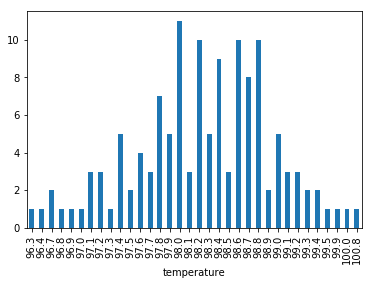

In [3]:
df.groupby('temperature').size().plot(kind='bar')

From the bar chart we can say that the distrubition resembles normal.

### Is the sample size large? Are the observations independent?

In [4]:
df.shape

(130, 3)

In [5]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


###  Is the true population mean really 98.6 degrees F?

In [6]:
sample_stddev = df.temperature.std() / np.sqrt(130)
sample_mean = df.temperature.mean()

In [7]:
z_statistic = (sample_mean - 98.6) / sample_stddev
(len(df), sample_mean, sample_stddev, z_statistic)

(130, 98.24923076923078, 0.06430441683789101, -5.4548232923640789)

As I'm comparing a sample mean to a fixed value (assumed population mean of 98.6F), I'm using one-sample test. In the situation we have n >> 30 thus it's appropriate to use z-statistic. There is a distance of 5.45 std dev between sample mean and the assumed population mean, therefore it gives us very high confidence (>99.9%) that 98.6F is not the true population mean. In order to make a two-sample test I'm going to generate a second sample based on the assumed population mean and sample standard deviation.

In [8]:
other = pd.Series(np.random.normal(98.6, df.temperature.std(), 130))
other_mean = other.mean()
pooled_stddev = np.sqrt(sample_stddev * sample_stddev/130 + other.var()/130)
(other_mean, pooled_stddev, other_mean - sample_mean)

(98.53220304272719, 0.062307266060956767, 0.2829722734964122)

I assume there is no difference between two sample means (H0: sample_mean - other_mean = 0). I'm going to show 99% confidence, that H0 is not true and that there is in reality a difference between those two means. For that, the distance between means has to be >= 2.58 (z-value for 0.995 - two-sided test).

In [9]:
z_statistic = (other_mean - sample_mean) / pooled_stddev
z_statistic

4.541561384182276

### At what temperature should we consider someone's temperature to be "abnormal"?

In [10]:
(sample_mean - 1.96*sample_stddev, sample_mean + 1.96*sample_stddev, 1.96*sample_stddev)

(98.123194112228518, 98.375267426233037, 0.12603665700226638)

Margin of error is 0.126F and the confidence interval (98.12F, 98.38F) which means any temperature below 98.12F or above 98.38F would be considered abnormal.

### Is there a significant difference between males and females in normal temperature?

In [11]:
males = df.temperature[df.gender=='M']
females = df.temperature[df.gender=='F']
(males.size, females.size)

(65, 65)

In [12]:
males_mean = males.mean()
females_mean = females.mean()
males_std = males.std()
females_std = females.std()
(males_mean, females_mean)

(98.1046153846154, 98.39384615384613)

In [13]:
(males_mean - females_mean) / sample_stddev

-4.4978367498435876

I have used a two-sided test with H0 that there is no difference between means of the male and female samples. I'm comparing difference of two sample means and computing z-statistic for it which equals -4.5, therefore it gives us very high confidence (>99.9%) that males have different mean temperature than females.

I conclude that we should define two standard body temperatures (male and female) as there is a very high confidence that they are truly different.